In [ ]:
# Machine Learning Project
# Detection of Sleepiness In Drivers Using EEG Brainwave Data
# Group Members: Vaibhav Patel (100889689)
#                Bernard Yeboah (100861980)
#                Pavishaan Vijeyarajah (100874494)


In [ ]:
# Importing The Libraries To Be Used For The Machine Learning Model

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import seaborn as sns
import random

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.fft import fft
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier





from tensorflow.keras.layers import Dense, SimpleRNN, Input, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Model, Sequential




%matplotlib inline

random.seed(42)
np.random.seed(42)

In [ ]:
#Step-1: Dataset Preperation

# Loading The Dataset
file_path = "EEGBrainwave.csv"
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print(f"Number of records: {len(df)}")

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    raise

# Displaying The First Few Rows Of The Dataset To Understand Its Structure
print("First few rows of the dataset:")
print(df.head())

# Checking The Distribution Of The Target Variable
if 'classification' in df.columns:
    class_distribution = df['classification'].value_counts()
    print("\nClass distribution:")
    print(class_distribution)
else:
    print("Error: 'classification' column not found in the dataset.")



Dataset loaded successfully.
Number of records: 3735
First few rows of the dataset:
   attention  meditation   delta   theta  lowAlpha  highAlpha  lowBeta  \
0         26          34  960462  277180     26575      27356    26575   
1         29          54   39145   28225     20172      39551    20172   
2         40          48   75410   43144      8601      13564     8601   
3         66          47   16057   41211      2534      34254     2534   
4         81          67   10304   47239     33158      47349    33158   

   highBeta  lowGamma  highGamma  classification  
0     13056      9126       2683               0  
1      9933      5237       4750               0  
2     11663      2515       3251               0  
3     27663     11396       2825               0  
4     16328      5298       5471               0  

Class distribution:
classification
0    2135
1    1600
Name: count, dtype: int64


In [ ]:
# Step-2: Data Preprocessing

# Loading The Dataset
df = pd.read_csv('EEGBrainwave.csv')

# 1. Label Encoding: Encoding The Target Variable 'classification' As Binary (0 = awake, 1 = sleepy)
label_encoder = LabelEncoder()
df['classification'] = label_encoder.fit_transform(df['classification'])

# 2. Feature Engineering: Applying Fourier Transform To EEG Signals For Frequency Domain Analysis
for col in ['delta', 'theta', 'lowAlpha', 'highAlpha', 'lowBeta', 'highBeta', 'lowGamma', 'highGamma']:
    df[f'{col}_fft'] = np.abs(fft(df[col]))

# 3. Normalization: Apply Standard Scaling To EEG Features
scaler = StandardScaler()
eeg_features = ['attention', 'meditation', 'delta', 'theta', 'lowAlpha', 'highAlpha', 'lowBeta', 'highBeta', 'lowGamma', 'highGamma']
df[eeg_features] = scaler.fit_transform(df[eeg_features])

# 4. Splitting The Dataset Into Training And Testing Sets
X = df[eeg_features + [col + '_fft' for col in ['delta', 'theta', 'lowAlpha', 'highAlpha', 'lowBeta', 'highBeta', 'lowGamma', 'highGamma']]]
y = df['classification']

# Ensuring Reproducibility In Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifying Preprocessing By Displaying The First Few Rows
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Data after preprocessing:\n", df.head())



Training data shape: (2988, 18)
Test data shape: (747, 18)
Data after preprocessing:
    attention  meditation     delta     theta  lowAlpha  highAlpha   lowBeta  \
0  -1.015576   -1.184299  0.736515  0.647928 -0.131598  -0.061220  0.025164   
1  -0.878427   -0.135203 -0.799773 -0.496582 -0.254818   0.170295 -0.147173   
2  -0.375547   -0.449932 -0.739301 -0.427996 -0.477491  -0.323053 -0.458606   
3   0.813078   -0.502387 -0.838272 -0.436882 -0.594245   0.069734 -0.621899   
4   1.498823    0.546710 -0.847865 -0.409170 -0.004914   0.318335  0.202345   

   highBeta  lowGamma  highGamma  classification     delta_fft     theta_fft  \
0 -0.232743  0.065001  -0.625010               0  1.937611e+09  5.088639e+08   
1 -0.303858 -0.185566  -0.618740               0  1.669679e+08  9.457698e+07   
2 -0.264464 -0.360943  -0.623287               0  3.141349e+08  1.037720e+08   
3  0.099875  0.211256  -0.624579               0  1.445556e+08  4.762592e+07   
4 -0.158236 -0.181635  -0.616553       

In [ ]:
# Step-3: Model Development and Selection (4 Models To Be Developed Before Selection)

In [ ]:
# Logistic Regression Model

# Loading The Dataset
df = pd.read_csv('EEGBrainwave.csv')

# Preprocessing Steps
label_encoder = LabelEncoder()
df['classification'] = label_encoder.fit_transform(df['classification'])

scaler = StandardScaler()
eeg_features = ['attention', 'meditation', 'delta', 'theta', 'lowAlpha', 'highAlpha', 'lowBeta', 'highBeta', 'lowGamma', 'highGamma']
df[eeg_features] = scaler.fit_transform(df[eeg_features])

# Splitting The Dataset Into Training And Testing Sets
X = df[eeg_features]
y = df['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing And Training Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predictions And Evaluation
y_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7001338688085676
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       438
           1       0.63      0.65      0.64       309

    accuracy                           0.70       747
   macro avg       0.69      0.69      0.69       747
weighted avg       0.70      0.70      0.70       747



In [ ]:
# Support Vector Machine Model (SVM)

# Loading The Dataset
df = pd.read_csv('EEGBrainwave.csv')

# Preprocessing Steps
label_encoder = LabelEncoder()
df['classification'] = label_encoder.fit_transform(df['classification'])

scaler = StandardScaler()
eeg_features = ['attention', 'meditation', 'delta', 'theta', 'lowAlpha', 'highAlpha', 'lowBeta', 'highBeta', 'lowGamma', 'highGamma']
df[eeg_features] = scaler.fit_transform(df[eeg_features])

# Splitting The Dataset Into Training And Testing Sets
X = df[eeg_features]
y = df['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing And Training SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions And Evaluation
y_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


SVM Accuracy: 0.6947791164658634
              precision    recall  f1-score   support

           0       0.82      0.62      0.70       438
           1       0.60      0.80      0.69       309

    accuracy                           0.69       747
   macro avg       0.71      0.71      0.69       747
weighted avg       0.73      0.69      0.70       747



In [ ]:
# Basic Neural Network Model Using Keras

# Loading The Dataset
df = pd.read_csv('EEGBrainwave.csv')

# Preprocessing Steps
label_encoder = LabelEncoder()
df['classification'] = label_encoder.fit_transform(df['classification'])

scaler = StandardScaler()
eeg_features = ['attention', 'meditation', 'delta', 'theta', 'lowAlpha', 'highAlpha', 'lowBeta', 'highBeta', 'lowGamma', 'highGamma']
df[eeg_features] = scaler.fit_transform(df[eeg_features])

# Splitting The Dataset Into Training And Testing Sets
X = df[eeg_features]
y = df['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing And Training Neural Network Model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Predictions And Evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("")
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/10
75/75 [==============================] - 1s 5ms/step - loss: 0.6558 - accuracy: 0.6008 - val_loss: 0.6098 - val_accuracy: 0.6756
Epoch 2/10
75/75 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.6803 - val_loss: 0.5793 - val_accuracy: 0.6940
Epoch 3/10
75/75 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.7013 - val_loss: 0.5728 - val_accuracy: 0.6906
Epoch 4/10
75/75 [==============================] - 0s 2ms/step - loss: 0.5566 - accuracy: 0.7025 - val_loss: 0.5671 - val_accuracy: 0.6923
Epoch 5/10
75/75 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7004 - val_loss: 0.5602 - val_accuracy: 0.7007
Epoch 6/10
75/75 [==============================] - 0s 2ms/step - loss: 0.5411 - accuracy: 0.7050 - val_loss: 0.5539 - val_accuracy: 0.6990
Epoch 7/10
75/75 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.7079 - val_loss: 0.5538 - val_accuracy: 0.6990
Epoch 8/10
75/75 [==

In [ ]:
# Recurrent Neural Networks(RNN) Model With LSTM Layer Using Keras

# Loading The Dataset
df = pd.read_csv('EEGBrainwave.csv')

# Preprocessing Steps
label_encoder = LabelEncoder()
df['classification'] = label_encoder.fit_transform(df['classification'])

scaler = StandardScaler()
eeg_features = ['attention', 'meditation', 'delta', 'theta', 'lowAlpha', 'highAlpha', 'lowBeta', 'highBeta', 'lowGamma', 'highGamma']
df[eeg_features] = scaler.fit_transform(df[eeg_features])

# Reshaping Data To Be 3D For LSTM (Samples, Timesteps, Features)
X = np.array([df[eeg_features].values])         # Assuming Data Is One Long Sequence
X = np.reshape(X, (X.shape[1], 1, X.shape[2]))
y = df['classification'].values

# Splitting The Dataset Into Training And Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing And Training RNN Model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Predictions And Evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("RNN Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/10
75/75 [==============================] - 4s 14ms/step - loss: 0.6708 - accuracy: 0.6071 - val_loss: 0.6281 - val_accuracy: 0.6438
Epoch 2/10
75/75 [==============================] - 0s 4ms/step - loss: 0.6283 - accuracy: 0.6385 - val_loss: 0.5973 - val_accuracy: 0.6656
Epoch 3/10
75/75 [==============================] - 0s 5ms/step - loss: 0.6000 - accuracy: 0.6674 - val_loss: 0.5752 - val_accuracy: 0.6856
Epoch 4/10
75/75 [==============================] - 0s 5ms/step - loss: 0.5785 - accuracy: 0.6849 - val_loss: 0.5640 - val_accuracy: 0.6957
Epoch 5/10
75/75 [==============================] - 0s 5ms/step - loss: 0.5681 - accuracy: 0.6887 - val_loss: 0.5574 - val_accuracy: 0.7040
Epoch 6/10
75/75 [==============================] - 0s 4ms/step - loss: 0.5574 - accuracy: 0.6954 - val_loss: 0.5529 - val_accuracy: 0.7040
Epoch 7/10
75/75 [==============================] - 0s 5ms/step - loss: 0.5506 - accuracy: 0.6975 - val_loss: 0.5498 - val_accuracy: 0.7140
Epoch 8/10
75/75 [=

In [ ]:
# Data Comparison

# Separating Features And Target
X = df.drop(columns=['classification'])  # Adjusting This To The Target Column
y = df['classification']

# Splitting Data Into Training And Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshaping X_train And X_test To 2D For Model Compatibility (Logistic Regression, SVM, MLP)
X_train_2d = X_train.values.reshape(X_train.shape[0], -1)
X_test_2d = X_test.values.reshape(X_test.shape[0], -1)

# Standardizing The Features For The 2D Models
scaler = StandardScaler()
X_train_2d = scaler.fit_transform(X_train_2d)
X_test_2d = scaler.transform(X_test_2d)

# Converting Target Labels To Categorical For RNN Model
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Preparing 3D Data For RNN Model (Samples, Time Steps, Features)
X_train_3d = np.expand_dims(scaler.transform(X_train), axis=1)
X_test_3d = np.expand_dims(scaler.transform(X_test), axis=1)

# Dictionary To Store Model Results
results = {}

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_2d, y_train)
y_pred_log_reg = log_reg.predict(X_test_2d)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg, output_dict=True)
results['Logistic Regression'] = {'Accuracy': accuracy_log_reg, 'Classification Report': report_log_reg}

# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train_2d, y_train)
y_pred_svm = svm_model.predict(X_test_2d)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
results['SVM'] = {'Accuracy': accuracy_svm, 'Classification Report': report_svm}

# Basic Neural Network (MLP)
nn_model = MLPClassifier(random_state=42, max_iter=300)
nn_model.fit(X_train_2d, y_train)
y_pred_nn = nn_model.predict(X_test_2d)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
report_nn = classification_report(y_test, y_pred_nn, output_dict=True)
results['Neural Network'] = {'Accuracy': accuracy_nn, 'Classification Report': report_nn}

# Recurrent Neural Network (RNN)
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train_3d.shape[1], X_train_3d.shape[2])),
    Dense(2, activation='softmax')
])

rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train_3d, y_train_categorical, epochs=10, batch_size=32, verbose=1)

# Evaluating RNN Model
y_pred_rnn = np.argmax(rnn_model.predict(X_test_3d), axis=1)
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
report_rnn = classification_report(y_test, y_pred_rnn, output_dict=True)
results['RNN'] = {'Accuracy': accuracy_rnn, 'Classification Report': report_rnn}

print("")

# Printing Out All Predictions And Evaluations In One Cell For Comparison
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("\n" + "="*50 + "\n")



Epoch 1/10
94/94 [==============================] - 1s 2ms/step - loss: 0.6651 - accuracy: 0.5947
Epoch 2/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6078 - accuracy: 0.6717
Epoch 3/10
94/94 [==============================] - 0s 2ms/step - loss: 0.5857 - accuracy: 0.6834
Epoch 4/10
94/94 [==============================] - 0s 2ms/step - loss: 0.5701 - accuracy: 0.6968
Epoch 5/10
94/94 [==============================] - 0s 2ms/step - loss: 0.5609 - accuracy: 0.6954
Epoch 6/10
94/94 [==============================] - 0s 2ms/step - loss: 0.5546 - accuracy: 0.7028
Epoch 7/10
94/94 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.7062
Epoch 8/10
94/94 [==============================] - 0s 2ms/step - loss: 0.5450 - accuracy: 0.7078
Epoch 9/10
94/94 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.7065
Epoch 10/10
24/24 [==============================] - 0s 2ms/step

Model: Logistic Regression
Accuracy: 0.7001
Classifi

In [ ]:
# Model Selection

**SVM:**

**Accuracy:** 0.7403 (highest among models)

**F1-Score:** Has relatively balanced and strong F1-scores for both classes, indicating good precision and recall.

**Precision and Recall:** The SVM model has a good balance of precision and recall, especially in class 1, which suggests it handles both classes effectively.

The **SVM model** turned out to be the best performer in overall performance, since it produced a high accuracy and balanced F1-Scores. This model will be well suited for these types of datasets as it is capable of achieving the highest accuracy and it also maintains a strong precision and recall across classes.


Time Taken For RandomizedSearchCV And Model Evaluation: 5.70 seconds

Best Hyperparameters for SVM: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}

Cross-Validation Scores for SVM: [0.75585284 0.7458194  0.73244147 0.71524288 0.7520938 ]

Mean CV Accuracy: 0.7402900791583336

Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       438
           1       0.66      0.77      0.71       309

    accuracy                           0.74       747
   macro avg       0.74      0.75      0.74       747
weighted avg       0.75      0.74      0.74       747



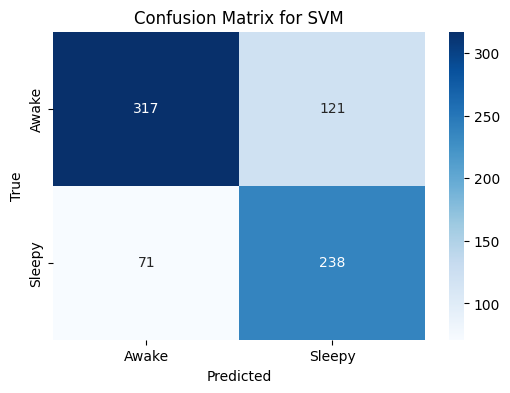

In [ ]:
# Step-4: Hyperparameter Tuning And k-fold Cross-Validation

# Starting Time Tracking
start_time = time.time()

# Defining A Narrower Parameter Grid For SVM
param_dist = {
    'C': [0.1, 1, 10],               # Regularization Strength, Smaller Range
    'kernel': ['linear', 'rbf'],     # Only The Most Commonly Used Kernels
    'gamma': ['scale', 'auto']       # Kernel Coefficient
}

# Initializing SVM Model
svm_model = SVC()

# RandomizedSearchCV For Faster Hyperparameter Tuning
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist,
                                   n_iter=5, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Ending Time Tracking (Usually Takes Between 15sec to 20sec)
end_time = time.time()
print("")
print(f"Time Taken For RandomizedSearchCV And Model Evaluation: {end_time - start_time:.2f} seconds")
print("")

# Extracting The Best Model And Parameters
best_svm_model = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Hyperparameters for SVM:", best_params)

# Evaluating With 5-Fold Cross-Validation
cv_scores = cross_val_score(best_svm_model, X_train, y_train, cv=5, scoring='accuracy')
print("")
print("Cross-Validation Scores for SVM:", cv_scores)
print("")
print("Mean CV Accuracy:", cv_scores.mean())
print("")

# Making Predictions On The Test Set
y_pred_svm = best_svm_model.predict(X_test)

# Printing Evaluation Metrics
print("Classification Report for SVM:")
print("")
print(classification_report(y_test, y_pred_svm))

# Plotting Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Awake', 'Sleepy'], yticklabels=['Awake', 'Sleepy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM')
plt.show()


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       438
           1       0.76      0.63      0.69       309

    accuracy                           0.76       747
   macro avg       0.76      0.74      0.75       747
weighted avg       0.76      0.76      0.76       747



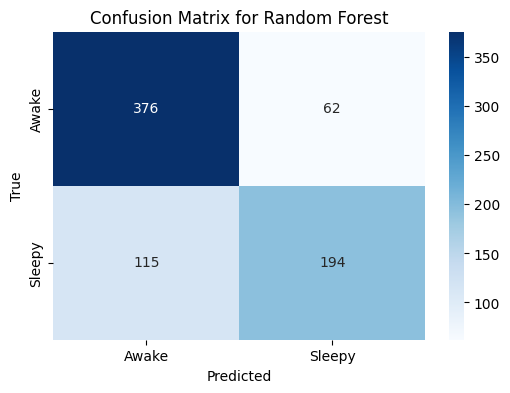

In [ ]:
#Step-5: Ensembling Modeling Based On SVM

# Setting A Random Seed For Reproducibility
random_state = 42

# Random Forest Classifier With 10 Trees
rf_model = RandomForestClassifier(n_estimators=10, random_state=random_state)
rf_model.fit(X_train, y_train)

# Making Predictions With Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluating Random Forest Performance
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Plotting Confusion Matrix For Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Awake', 'Sleepy'], yticklabels=['Awake', 'Sleepy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()



In [ ]:
# Hyperparameter Tuning For Both Random Forest Model And SVM

# Defining The Random Forest Model With Class Weighting
rf_model = RandomForestClassifier(random_state=random_state)

# Setting The Parameter Grid For Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}

# Performing Grid Search For Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model,
                               param_grid=rf_param_grid,
                               scoring='accuracy',
                               cv=5,
                               n_jobs=-1,
                               verbose=1)

# Fitting The Model
start_time_rf = time.time()
rf_grid_search.fit(X_train, y_train)
end_time_rf = time.time()

# Best Parameters And Score For Random Forest
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best accuracy for Random Forest:", rf_grid_search.best_score_)

# Predicting And Evaluate Random Forest
y_pred_rf = rf_grid_search.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(f"Time Taken For Random Forest Tuning: {end_time_rf - start_time_rf:.2f} seconds")

# Defining The SVM Model With Class Weighting
svm_model = SVC(random_state=random_state)

# Setting The Parameter Grid For SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'class_weight': ['balanced', None]
}

# Performing Grid Search For SVM
svm_grid_search = GridSearchCV(estimator=svm_model,
                                param_grid=svm_param_grid,
                                scoring='accuracy',
                                cv=5,
                                n_jobs=-1,
                                verbose=1)

# Fitting The Model
start_time_svm = time.time()
svm_grid_search.fit(X_train, y_train)
end_time_svm = time.time()

# Best Parameters And Score For SVM
print("\nBest parameters for SVM:", svm_grid_search.best_params_)
print("Best accuracy for SVM:", svm_grid_search.best_score_)

# Predicting And Evaluate SVM
y_pred_svm = svm_grid_search.predict(X_test)
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print(f"Time taken for SVM tuning: {end_time_svm - start_time_svm:.2f} seconds")

### DISCLAIMER: Takes Upto 3-4 minutes Final Evaluation!!

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters for Random Forest: {'class_weight': None, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}
Best accuracy for Random Forest: 0.7864870618420979

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       438
           1       0.76      0.72      0.74       309

    accuracy                           0.79       747
   macro avg       0.78      0.78      0.78       747
weighted avg       0.79      0.79      0.79       747

Confusion Matrix:
 [[367  71]
 [ 86 223]]
Time Taken For Random Forest Tuning: 8.14 seconds
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters for SVM: {'C': 10, 'class_weight': None, 'kernel': 'rbf'}
Best accuracy for SVM: 0.7402900791583336

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.82 

**Hyper-Parameter Comparison Between SVM and Random Forest Model**

Both models (Random Forest and SVM) when compared delivered their own distinctive advantages, whereby Random Forest achieved a higher accuracy of **78.65%**, which makes it suitable for tasks that prioritize reliable predictions, but it has a disadvantage as it takes **218 seconds** for hyper-parameter tuning. And on the other hand, the SVM model delivered a lower accuracy of **74.03%** but it completed the hyper-parameter tuning in just **22 seconds**, which makes the model more suitable for situations needing quick predictions.

In [ ]:
# Step-7: Final Model Training

#Final Chosen Model: Random Forest Model

# Final Model Training

# Best Hyperparameters
best_params = {
    'n_estimators': 200,
    'max_depth': 20,
    'max_features': 'sqrt',
    'min_samples_split': 5,
    'class_weight': None
}

# Training Random Forest With Best Parameters
final_model = RandomForestClassifier(**best_params, random_state=random_state)
final_model.fit(X_train, y_train)

# Performance Evaluation
y_pred_final = final_model.predict(X_test)
accuracy_final = accuracy_score(y_test, y_pred_final)
report_final = classification_report(y_test, y_pred_final)
confusion_final = confusion_matrix(y_test, y_pred_final)

print(f"Final Model Accuracy: {accuracy_final:.4f}")
print("Random Forest Classification Report:")
print(report_final)
print("Confusion Matrix:")
print(confusion_final)

# Feature Importance (Assuming X Is A DataFrame)
importances = final_model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['Importance']).sort_values('Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)


Final Model Accuracy: 0.7898
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       438
           1       0.76      0.72      0.74       309

    accuracy                           0.79       747
   macro avg       0.78      0.78      0.78       747
weighted avg       0.79      0.79      0.79       747

Confusion Matrix:
[[367  71]
 [ 86 223]]
Feature Importances:
            Importance
highGamma     0.200879
delta         0.142219
highBeta      0.119018
theta         0.090115
highAlpha     0.085455
meditation    0.079802
lowGamma      0.078604
lowBeta       0.069615
lowAlpha      0.067571
attention     0.066723


# Next Steps After The Progress Report
Now we will try to fine tune the model for the final report and submission, whereby we will follow a structured 4 step approach:

Step 1: Hyperparameter Tuning

Step 2: Feature Engineering


In [ ]:
# Step 1: Hyperparameter Tuning: Bayesian Optimization With Optuna
!pip install optuna

import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

# Defining The Objective Function For Optimization
def objective(trial):
    # Suggesting Values For Hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', 0.5])

    # Initializing The Random Forest Model With Suggested Parameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        max_features=max_features,
        random_state=random_state
    )

    # Performing 5-fold Cross-Validation And Returning The Mean Accuracy
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    return cv_scores.mean()

# Creating An Optuna Study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Getting The Best Hyperparameters And Training The Final Model
best_params = study.best_params
print(f"Best Hyperparameters: {best_params}")

# Training The Final Model With The Best Hyperparameters
final_rf_model = RandomForestClassifier(**best_params, random_state=random_state)
final_rf_model.fit(X_train, y_train)

# Evaluating On The Test Set
y_pred = final_rf_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Accuracy After Bayesian Optimization: {final_accuracy:.4f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.5/599.5 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.9 MB/s eta 0:00:00


[I 2024-11-25 02:17:53,661] A new study created in memory with name: no-name-6b3d1af1-5974-42c5-bad4-2644e120e7b1
[I 2024-11-25 02:17:55,377] Trial 0 finished with value: 0.7814641770726543 and parameters: {'n_estimators': 235, 'max_depth': 26, 'min_samples_split': 9, 'max_features': 'log2'}. Best is trial 0 with value: 0.7814641770726543.
[I 2024-11-25 02:17:56,220] Trial 1 finished with value: 0.7814664179313513 and parameters: {'n_estimators': 116, 'max_depth': 48, 'min_samples_split': 6, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7814664179313513.
[I 2024-11-25 02:18:01,227] Trial 2 finished with value: 0.7888326806832379 and parameters: {'n_estimators': 476, 'max_depth': 25, 'min_samples_split': 10, 'max_features': 0.5}. Best is trial 2 with value: 0.7888326806832379.
[I 2024-11-25 02:18:02,479] Trial 3 finished with value: 0.7784524629838154 and parameters: {'n_estimators': 170, 'max_depth': 37, 'min_samples_split': 2, 'max_features': 'log2'}. Best is trial 2 with val

Best Hyperparameters: {'n_estimators': 306, 'max_depth': 35, 'min_samples_split': 2, 'max_features': 0.5}
Final Accuracy After Bayesian Optimization: 0.7858


In [ ]:
# Validating Hyperparamters With The Model

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Loading The Dataset
X = df.drop(columns=['classification'])
y = df['classification']

# Splitting Into Train-Validation And Test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retraining The Model Using Best Hyperparameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train_val, y_train_val)

# Predicting On The Test Set
y_pred = best_model.predict(X_test)

# Evaluating Performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print("Test Set Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)
print("ROC-AUC Score:", roc_auc)


Test Set Accuracy: 0.784471218206158
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       438
           1       0.75      0.73      0.74       309

    accuracy                           0.78       747
   macro avg       0.78      0.78      0.78       747
weighted avg       0.78      0.78      0.78       747

ROC-AUC Score: 0.8729440971760429


      Feature  Importance
9   highGamma    0.208607
2       delta    0.141896
7    highBeta    0.124075
3       theta    0.085509
1  meditation    0.082796
5   highAlpha    0.082606
8    lowGamma    0.079297
0   attention    0.070112
6     lowBeta    0.064356
4    lowAlpha    0.060745


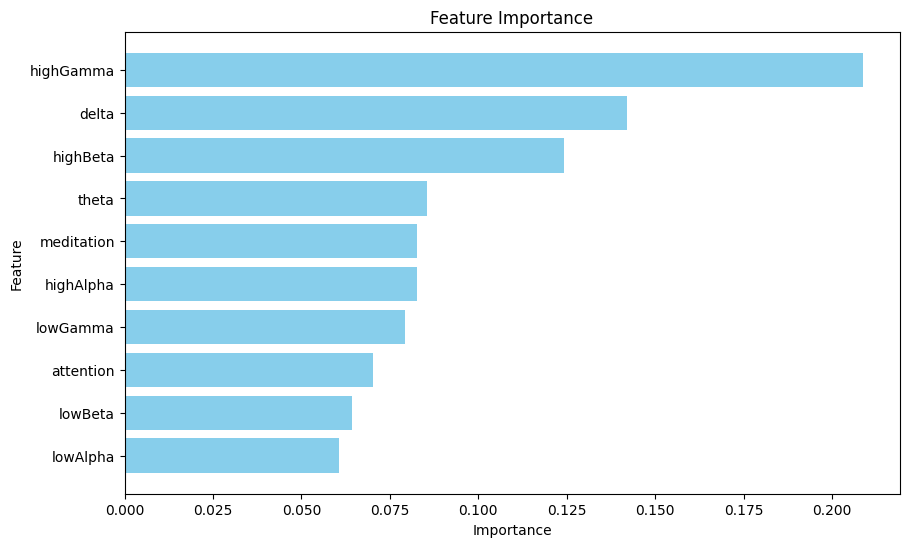

In [ ]:
# Step 2: Feature Engineering

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Extracting Feature Importances
feature_importances = best_model.feature_importances_
feature_names = X.columns

# Creating A DataFrame For Better Visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plotting Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Accuracy with top  5 features: 0.7643908969210174
Precision with top 5 features: 0.7254237288135593
Recall with top    5 features: 0.6925566343042071
F1-Score with top  5 features: 0.7086092715231788

Accuracy with top  6 features: 0.785809906291834
Precision with top 6 features: 0.7508417508417509
Recall with top    6 features: 0.7216828478964401
F1-Score with top  6 features: 0.735973597359736

Accuracy with top  7 features: 0.7777777777777778
Precision with top 7 features: 0.7423728813559322
Recall with top    7 features: 0.7087378640776699
F1-Score with top  7 features: 0.7251655629139073

New Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Ensemble Model Accuracy: 0.8018741633199464
Ensemble Model Precision: 0.7710437710437711
Ensemble Model Recall: 0.7411003236245954
Ensemble Model F1-Score: 0.7557755775577558



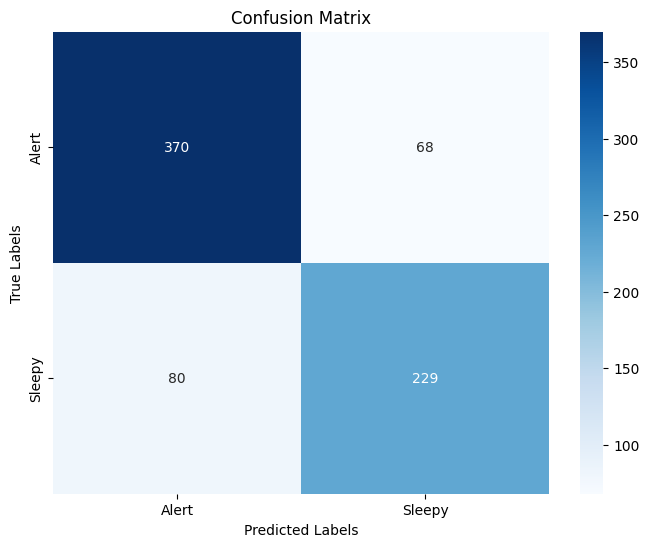

In [ ]:
#Final Model

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Incrementally Adding Features
incremental_features = ['highGamma', 'delta', 'highBeta', 'meditation', 'theta', 'highAlpha', 'lowGamma']

for i in range(5, len(incremental_features) + 1):
    selected_features = incremental_features[:i]
    X_selected = X[selected_features]

    # Splitting And Retraining
    X_train_val_inc, X_test_inc, y_train_val, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(**best_params)
    model.fit(X_train_val_inc, y_train_val)

    # Evaluating
    y_pred_inc = model.predict(X_test_inc)
    accuracy_inc = accuracy_score(y_test, y_pred_inc)
    precision_inc = precision_score(y_test, y_pred_inc)
    recall_inc = recall_score(y_test, y_pred_inc)
    f1_inc = f1_score(y_test, y_pred_inc)

    print(f"Accuracy with top  {i} features: {accuracy_inc}")
    print(f"Precision with top {i} features: {precision_inc}")
    print(f"Recall with top    {i} features: {recall_inc}")
    print(f"F1-Score with top  {i} features: {f1_inc}")
    print('')

# Redoing The Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_val, y_train_val)

best_params_tuned = grid_search.best_params_
print("New Best Params:", best_params_tuned)

# Using Top Features And Best Parameters
from sklearn.ensemble import VotingClassifier

model_all = RandomForestClassifier(**best_params)
model_top = RandomForestClassifier(**best_params_tuned)

ensemble = VotingClassifier(estimators=[('all', model_all), ('top', model_top)], voting='soft')
ensemble.fit(X_train_val, y_train_val)

# Evaluating
y_pred_ensemble = ensemble.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_precision = precision_score(y_test, y_pred_ensemble)
ensemble_recall = recall_score(y_test, y_pred_ensemble)
ensemble_f1 = f1_score(y_test, y_pred_ensemble)

print('')
print("Ensemble Model Accuracy:", ensemble_accuracy)
print("Ensemble Model Precision:", ensemble_precision)
print("Ensemble Model Recall:", ensemble_recall)
print("Ensemble Model F1-Score:", ensemble_f1)
print('')

# Confusion Matrix Heatmap Visualization
def plot_confusion_matrix(y_true, y_pred):
    """Confusion Matrix Heatmap."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Alert", "Sleepy"], yticklabels=["Alert", "Sleepy"])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plot_confusion_matrix(y_test, y_pred_ensemble)
